In this jupyter notebook I will implement the desired AlexNet convolutional network and train it on my dataset

In [42]:
#%pip install tensorflow
#%pip install seaborn
#%pip install scikeras
%pip install imblearn


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 330.3 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 722.1 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.2 MB/s eta 0:00:00


In [4]:
#Move images from the all_images folder to train, validation and test folders in the dataset folder by taking their name from CSV files:
import os
import shutil
import pandas as pd

#Read the CSV files:
train = pd.read_csv('./labels/train_labels.csv')
validation = pd.read_csv('./labels/val_labels.csv')
test = pd.read_csv('./labels/test_labels.csv')


def switch_case(label):
    if label == 0:
        return 'NoIssues'
    elif label == 1:
        return 'CollisionIssues'
    elif label == 2:
        return 'TextureIssues'
    elif label == 3:
        return 'LightingIssues'
    else:
        return 'AnimationIssues'
    


#Move the images to the train folder:
#Also take into consideration the class of the image:

'''
for i in range(len(train)):
    image, label = train.iloc[i]
    print(image, label)
    label = switch_case(label)
    shutil.move('./all_images/' + image, './dataset/train/' + label + '/' + image)
'''
#Check the number of images in each folder from the train folder:
print('Number of images in the train folder:')
print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))

#Move the images to the validation folder:

'''
for i in range(len(validation)):
    image, label = validation.iloc[i]
    label = switch_case(label)
    shutil.move('./all_images/' + image, './dataset/validation/' + label + '/' + image)
'''

#Move the images to the testing folder:

'''    
for i in range(len(test)):
    image, label = test.iloc[i]
    label = switch_case(label)
    shutil.move('./all_images/' + image, './dataset/test/' + label + '/' + image)
'''

Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67


"    \nfor i in range(len(test)):\n    image, label = test.iloc[i]\n    label = switch_case(label)\n    shutil.move('./all_images/' + image, './dataset/test/' + label + '/' + image)\n"

VGG16 model with batch size 32, learning rate 0.001, 256 units per layer, l2 regularizer, dropout, 10 epochs

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67


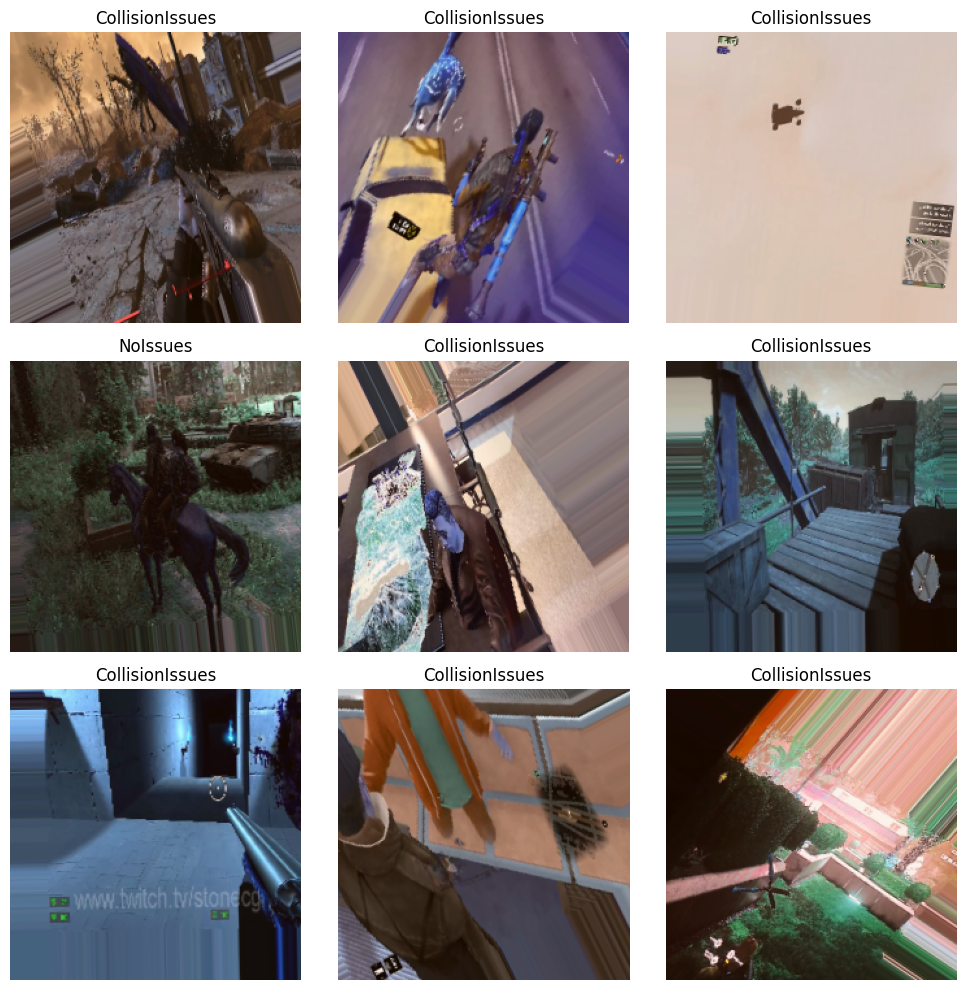

Shape of X_smote_img: (704, 224, 224, 3)
Shape of y_smote: (704, 5)
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3060 - loss: 4.3597

c:\Users\liciu\anaconda3\envs\video-games-glitch-detection\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.3091 - loss: 4.3085 - val_accuracy: 0.5909 - val_loss: 1.4272
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.5762 - loss: 1.4312 - val_accuracy: 0.5909 - val_loss: 1.4121
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.6032 - loss: 1.2667 - val_accuracy: 0.6515 - val_loss: 1.3208
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.7109 - loss: 1.0201 - val_accuracy: 0.6515 - val_loss: 1.2738
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7704 - loss: 0.8768 - val_accuracy: 0.6667 - val_loss: 1.2750
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.7862 - loss: 0.8079 - val_accuracy: 0.6818 - val_loss: 1.2233
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.8328 - loss: 0.7340 - val_accuracy: 0.6667 - val_loss: 1.2183
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8607 - loss: 0.6271 - val_accuracy: 0.6667 - val_loss: 1.2463
Epo

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import os

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

validation_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)
#print classes:
print(train_generator.class_indices)

#Get number of images in each class before augmentation
print('Number of images in the train folder:')
print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]
        
        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())
        
        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Plot some augmented images
plot_augmented_images(train_generator, train_generator.class_indices)

# Get training data and labels
#x = np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
#y = np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])

x_list = []
y_list = []

for i in range(len(train_generator)):
    x_batch, y_batch = next(train_generator)
    x_list.append(x_batch)
    y_list.append(y_batch)

x = np.concatenate(x_list)
y = np.concatenate(y_list)

X_train = x.reshape(x.shape[0], -1)

train_generator.reset()

# Apply SMOTE to balance minority classes
minority_class_indices = [train_generator.class_indices['AnimationIssues'], train_generator.class_indices['LightingIssues']]
sm = SMOTE(sampling_strategy={i: 100 for i in minority_class_indices}, random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y)

# Reshape data back to image dimensions
X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

# Print the shape of the oversampled data
print('Shape of X_smote_img:', X_smote_img.shape)
print('Shape of y_smote:', y_smote.shape)

#Check data quality



#Train:
epochs = 10
history = model.fit(
    X_smote_img, y_smote,
    #steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator
    #validation_steps=validation_generator.samples // validation_generator.batch_size
)

#Training:
# epochs = 10
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // validation_generator.batch_size
# )

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# test_generator.reset()
# predictions = model.predict(test_generator)
# predicted_classes = tf.argmax(predictions, axis=1)
# true_classes = test_generator.classes
# class_labels = list(test_generator.class_indices.keys())

# print(f"Number of true classes: {len(true_classes)}")
# print(f"Number of predicted classes: {len(predicted_classes)}")
#classification report
#print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# if len(predicted_classes) > len(true_classes):
#     predicted_classes = predicted_classes[:len(true_classes)]

# report = classification_report(true_classes, predicted_classes, target_names=class_labels)
# report_df = pd.DataFrame(report).transpose()

# plt.figure(figsize=(10, 5))
# sns.heatmap(report_df, annot=True)
# plt.title('Classification Report')
# plt.xlabel('Metrics')
# plt.ylabel('Classes')
# plt.show()

# #confusion matrix

# #print(confusion_matrix(true_classes, predicted_classes))
# cm = confusion_matrix(true_classes, predicted_classes)
# plt.figure(figsize=(10, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

#Save the model:
#model.save('model1_VGG.h5')      

Try to use oversampling for the minority classes (AnimationIssues and LightingIssues)

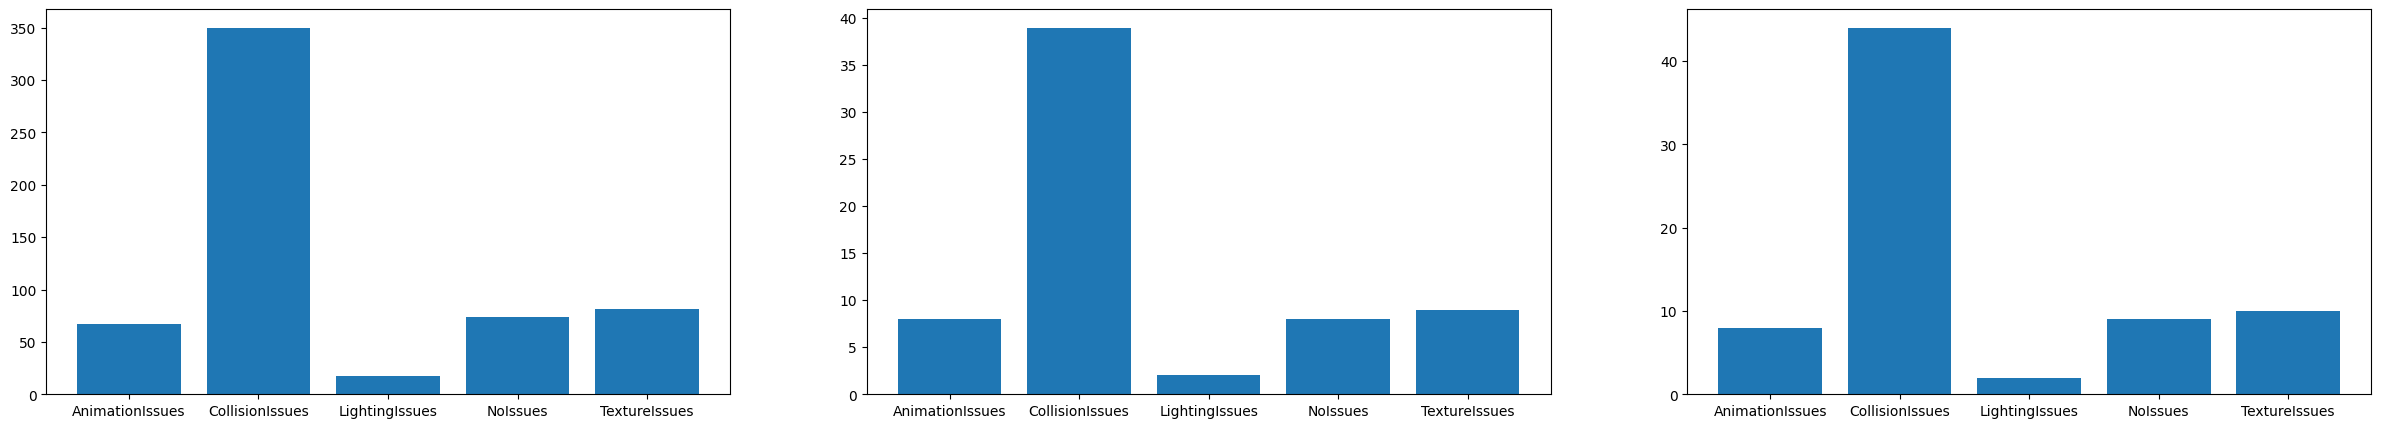

In [34]:
#Try to visualise the class distribution for the model:
import os
#Get the class distribution for the train folder:
train_class_distribution = {}
for folder in os.listdir('./dataset/train'):
    train_class_distribution[folder] = len(os.listdir('./dataset/train/' + folder))

#Get the class distribution for the validation folder:
validation_class_distribution = {}
for folder in os.listdir('./dataset/validation'):
    validation_class_distribution[folder] = len(os.listdir('./dataset/validation/' + folder))

#Get the class distribution for the test folder:

test_class_distribution = {}
for folder in os.listdir('./dataset/test'):
    test_class_distribution[folder] = len(os.listdir('./dataset/test/' + folder))

#Plot the class distribution for the train, validation and test folders:

plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)
plt.bar(train_class_distribution.keys(), train_class_distribution.values())

plt.subplot(1, 3, 2)
plt.bar(validation_class_distribution.keys(), validation_class_distribution.values())

plt.subplot(1, 3, 3)
plt.bar(test_class_distribution.keys(), test_class_distribution.values())

plt.show()

#Now use oversampling for the minority classes:


Plot learning curve and metrics:
- accuracy
- precision
- recall
- f1 score
- confusion matrix
- classification report

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 589 images belonging to 5 classes.
Found 70 images belonging to 5 classes.
Found 77 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67


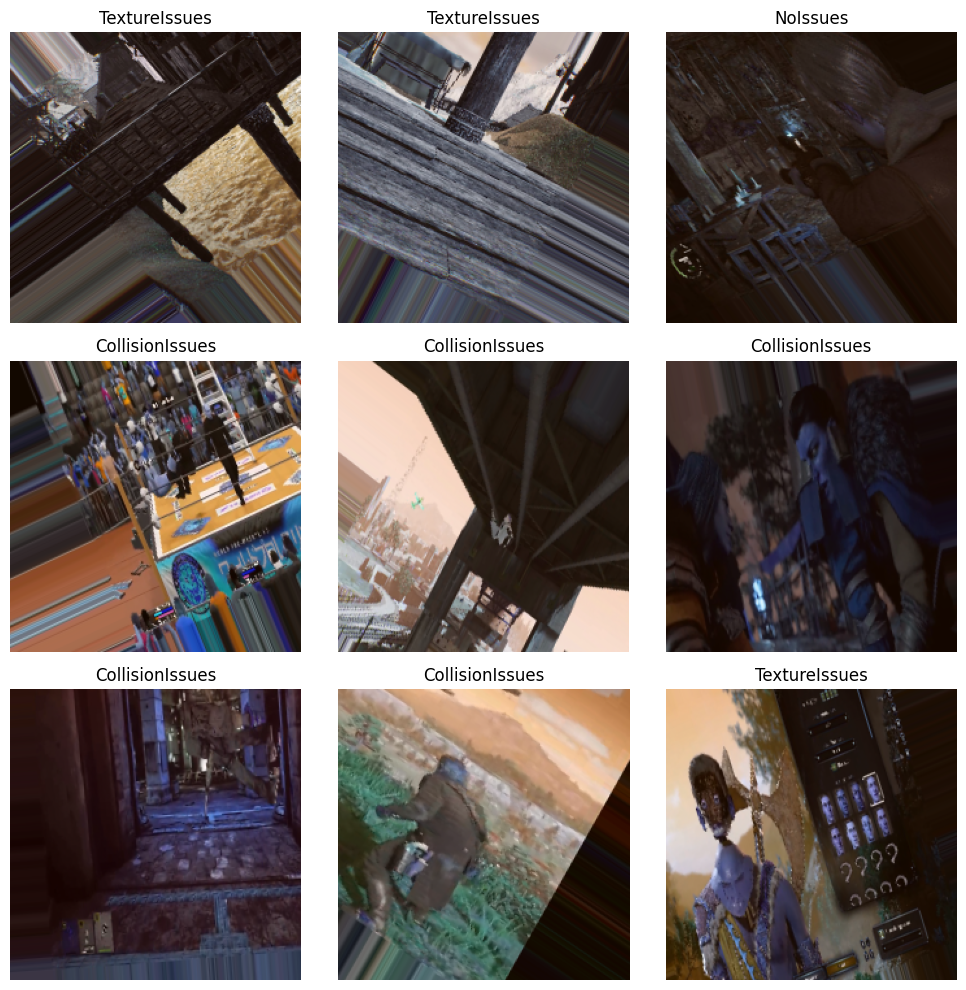

Shape of X_smote_img: (904, 224, 224, 3)
Shape of y_smote: (904, 5)
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3483 - loss: 6.2221

c:\Users\liciu\anaconda3\envs\video-games-glitch-detection\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.3508 - loss: 6.1567 - val_accuracy: 0.4000 - val_loss: 2.1216
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.6615 - loss: 1.4230 - val_accuracy: 0.6143 - val_loss: 1.6890
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.7936 - loss: 1.0726 - val_accuracy: 0.5000 - val_loss: 1.6852
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.8767 - loss: 0.8485 - val_accuracy: 0.4286 - val_loss: 1.8298
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.8704 - loss: 0.7918 - val_accuracy: 0.4714 - val_loss: 1.7962
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.9169 - loss: 0.6143 - val_accuracy: 0.5714 - val_loss: 1.8417
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.9102 - loss: 0.5960 - val_accuracy: 0.5714 - val_loss: 1.8345
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.9647 - loss: 0.4867 - val_accuracy: 0.5286 - val_loss: 1.

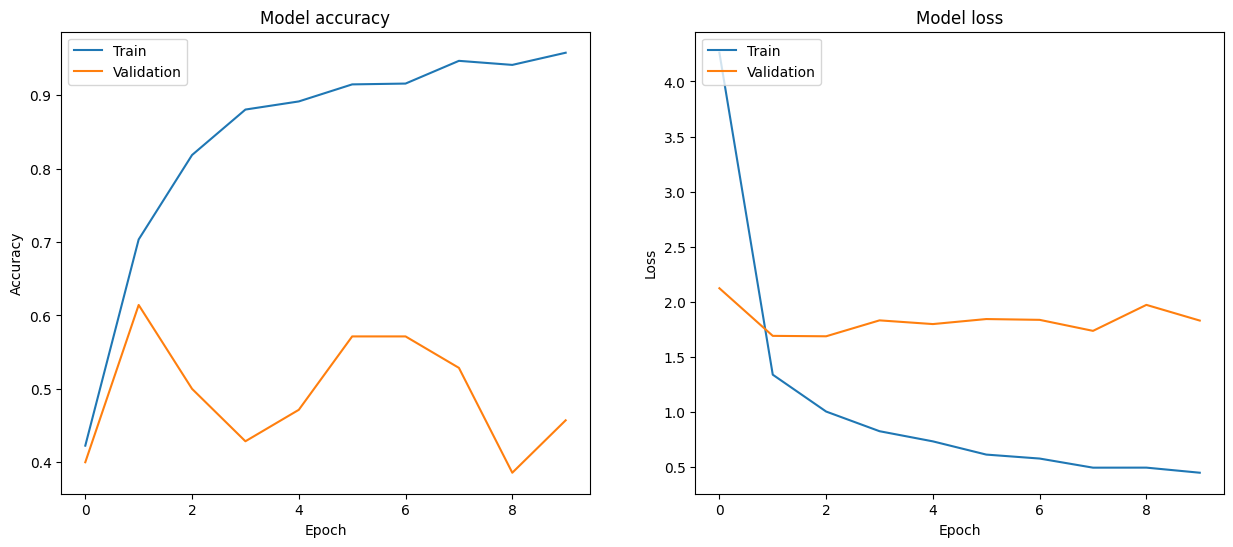

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5579 - loss: 1.5587
Test Accuracy: 54.55%
Test Loss: 1.6589
2/3 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A4126D53A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
                 precision    recall  f1-score   support

AnimationIssues       0.15      0.3

<Figure size 1000x1000 with 0 Axes>

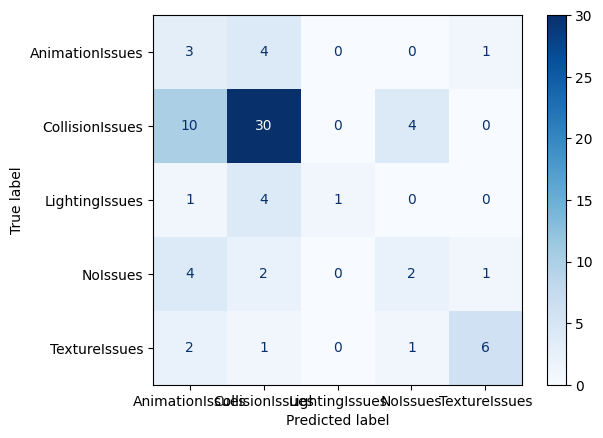

Precision: 0.6424
Recall: 0.5455
F1 Score: 0.5637


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import os

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

validation_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)
#print classes:
print(train_generator.class_indices)

#Get number of images in each class before augmentation
print('Number of images in the train folder:')
print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]
        
        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())
        
        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Plot some augmented images
plot_augmented_images(train_generator, train_generator.class_indices)

# Get training data and labels
#x = np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
#y = np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])

x_list = []
y_list = []

for i in range(len(train_generator)):
    x_batch, y_batch = next(train_generator)
    x_list.append(x_batch)
    y_list.append(y_batch)

x = np.concatenate(x_list)
y = np.concatenate(y_list)

X_train = x.reshape(x.shape[0], -1)

train_generator.reset()

# Apply SMOTE to balance minority classes
minority_class_indices = [train_generator.class_indices['AnimationIssues'], train_generator.class_indices['LightingIssues']]
sm = SMOTE(sampling_strategy={i: 200 for i in minority_class_indices}, random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y)

# Reshape data back to image dimensions
X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

# Print the shape of the oversampled data
print('Shape of X_smote_img:', X_smote_img.shape)
print('Shape of y_smote:', y_smote.shape)

#Check data quality



#Train:
epochs = 10
history = model.fit(
    X_smote_img, y_smote,
    steps_per_epoch=X_smote_img.shape[0] // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Use GridSearch to find the best hyperparameters for the model:

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import ParameterGrid

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        './dataset/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(
        './dataset/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')
    
    test_generator = test_datagen.flow_from_directory(
        './dataset/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

    return train_generator, validation_generator, test_generator

def evaluate_model(model, train_generator, validation_generator, epochs):
    history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]  # Get the validation accuracy of the last epoch
    return val_accuracy

seed = 7
np.random.seed(seed)

# Hyperparameters to tune
batch_sizes = [32, 64, 128]
epochs_list = [10, 20, 30, 50]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

# Store the results
best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()
    print("Starting training...")
    val_accuracy = evaluate_model(model, train_generator, validation_generator, epochs)
    print("Training complete.")    
    print(f"Params: {params}, Validation Accuracy: {val_accuracy}")
    
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = params

print(f"Best params: {best_params}, Best validation accuracy: {best_score}")

# Train final model with best hyperparameters on full training data
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)
final_model = create_model()
final_model.fit(train_generator, validation_data=validation_generator, epochs=best_epochs, verbose=0)

# Evaluate final model on test data
test_loss, test_accuracy = final_model.evaluate(test_generator, verbose=0)
print(f"Test accuracy: {test_accuracy}")


Training with params: {'batch_size': 32, 'epochs': 10}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
Starting training...
Training complete.
Params: {'batch_size': 32, 'epochs': 10}, Validation Accuracy: 0.6818181872367859
Best params: {'batch_size': 32, 'epochs': 10}, Best validation accuracy: 0.6818181872367859
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
Test accuracy: 0.6849315166473389


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import ParameterGrid

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        '/content/sample_data/dataset/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes)

    validation_generator = validation_datagen.flow_from_directory(
        '/content/sample_data/dataset/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes)

    test_generator = test_datagen.flow_from_directory(
        '/content/sample_data/dataset/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes)

    return train_generator, validation_generator, test_generator

def evaluate_model(model, train_generator, validation_generator, epochs):
    history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]  # Get the validation accuracy of the last epoch
    return val_accuracy

seed = 7
np.random.seed(seed)

# Hyperparameters to tune
batch_sizes = [32, 64, 128, 256]
epochs_list = [10, 20, 30, 50, 100]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

# Store the results
best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()
    print("Starting training...")
    val_accuracy = evaluate_model(model, train_generator, validation_generator, epochs)
    print("Training complete.")
    print(f"Params: {params}, Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = params

print(f"Best params: {best_params}, Best validation accuracy: {best_score}")

# Train final model with best hyperparameters on full training data
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)
final_model = create_model()
final_model.fit(train_generator, validation_data=validation_generator, epochs=best_epochs, verbose=0)

# Evaluate final model on test data
test_loss, test_accuracy = final_model.evaluate(test_generator, verbose=0)
print(f"Test accuracy: {test_accuracy}")